# First analysis: Origin imports
We first compute the risk of gas disruption wrt. the origin country, that is,
- Russia,
- EU,
- Norway,
- Algeria,
- Other

The risk is computed as 
$$risk_{CH}=\sum_{i}proportion_i^2\times risk_i,$$
where the $risk_i$ is the risk in the exporting country $i$.The risk is bounded between $\min_i risk_i$ and $\max_i risk_i$.

In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import helpers
from settings import data_folder
sns.set()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We use the democracy index to quantify the risk:
$$risk_i=1-demo_i/10,$$
since the democracy index lie between 0 (no democracy) and 10 (good democracy)

In [6]:
index = helpers.load_index("democracy")
shares_10_20 = helpers.load_imports("origin")

Compute the risk

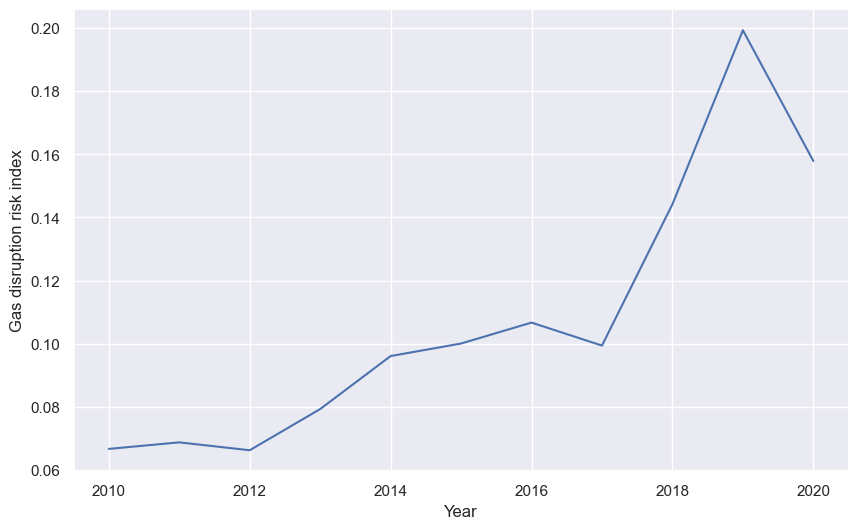

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# Compute risk
total_risk = (helpers.risk(index.loc[shares_10_20.index]) * shares_10_20**2).sum(
    axis=0
)
total_risk.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Gas disruption risk index")
plt.savefig(os.path.join("../figure", "risk_index_direct.png"), dpi=150)


Look at the risk in the exporting countries 

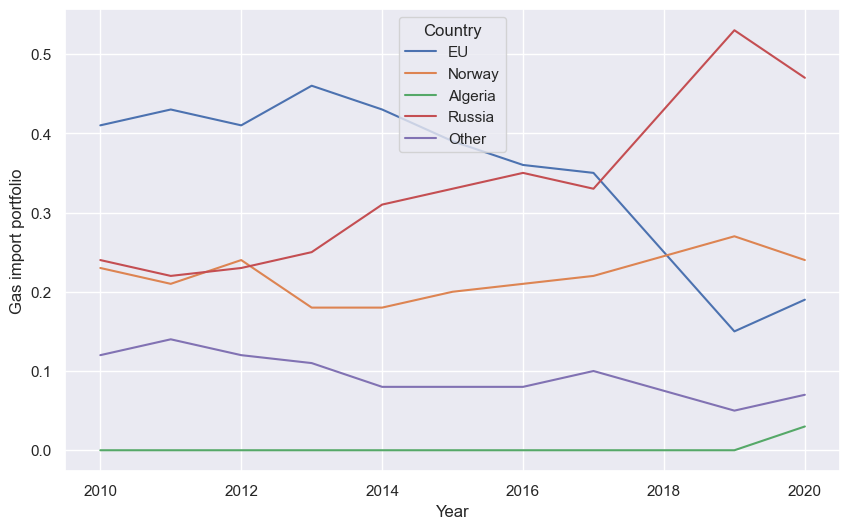

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
shares_10_20.T.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Gas import portfolio")
plt.savefig(os.path.join("../figure", "gas_portfolio.png"), dpi=150)

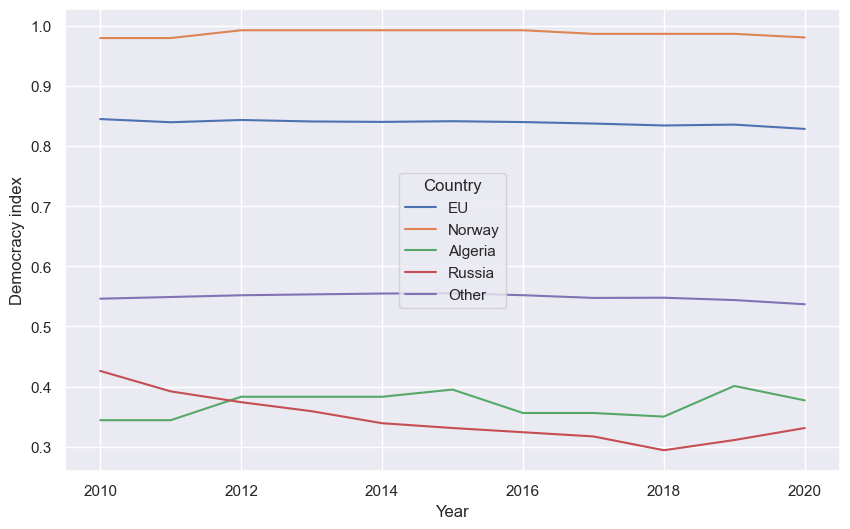

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
index.loc[shares_10_20.index].T.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Democracy index")
plt.savefig(os.path.join("../figure", "demo_index_10_20.png"), dpi=150)


<AxesSubplot: >

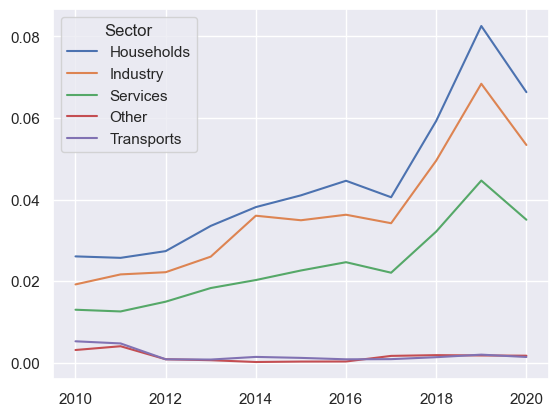

In [10]:
risk_index = (helpers.risk(index.loc[shares_10_20.index]) * shares_10_20**2).sum(
    axis=0
)
sector = pd.read_excel(
    os.path.join(data_folder, "gas_origin.xlsx"),
    sheet_name="consumption_sector",
    nrows=5,
).set_index("Sector")
sector_10_20 = sector[[str(i) for i in range(2010, 2021)]]
risk_by_sector=sector_10_20 * risk_index
risk_by_sector.T.plot()
